In [82]:
%matplotlib inline

In [83]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from ete2 import Tree, TreeStyle, TextFace, faces, Face, NodeStyle, AttrFace
from Bio import Phylo

# Export matplotlib svg text as text, not path
mpl.rcParams['svg.fonttype'] = 'none'

### Figure 1A - 12 species tree

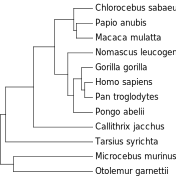

In [84]:
# First convert the nexus tree to a newick one
Phylo.convert('DUF_TREE_CONSENSUS.txt', 'nexus', 'DUF_TREE_CONSENSUS.tree', 'newick')
# Read in the Tree using ETE2
tree = Tree("DUF_TREE_CONSENSUS.tree")

# Do not color in the internal nodes
nstyle = NodeStyle()
nstyle["size"] = 0
nstyle["fgcolor"] = "black"

# Set style for nodes and round the time value
# Also re-format species name
for n in tree.traverse():
    n.set_style(nstyle)
    n.dist = round(n.dist, 2)
    # Remove the middle underscore
    n.name = " ".join(n.name.split("_"))


def layout(node):
    if node.is_leaf():
        # Add node name to laef nodes
        N = AttrFace("name",fsize=12, ftype="Source Sans Pro", fgcolor="black", fstyle="italic")
        N.margin_left = 5
        faces.add_face_to_node(N, node, 0, position="aligned")

    
# Tree formatting
ts = TreeStyle()
ts.layout_fn = layout
ts.show_leaf_name = False
# ts.tree_width = 200
ts.draw_guiding_lines = True
ts.show_branch_length = False
ts.show_scale = False
ts.branch_vertical_margin = 15
ts.margin_right = 50
ts.draw_aligned_faces_as_table = True

tree.render("2015-03-12-DUF1220-fig1a.svg", tree_style=ts, h=2, units="in")
tree.render("%%inline", tree_style=ts,h=2, units="in")

### Figure 1B

In [123]:
# Read in the data from the excel file and use the second sheet
xls = pd.ExcelFile('2015-03-12-figure-data.xlsx')
figure1b_data = xls.parse('figure1B', index_col=None, na_values=['NA'])

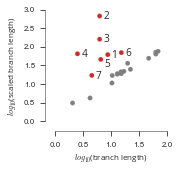

In [86]:
def label_point(x, y, val, ax):
    '''Uses the Notes information provided in the dataframe to color certain points in the plot'''
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    label_num = 1
    for i, point in a.iterrows():
        if str(point['val']) != "nan":
            if str(point['val']) == "LCA Homininae":
                ax.text(point['x']+0.08, point['y']-0.2, str(label_num), name="Open Sans", size=10)  
            else:
                ax.text(point['x']+0.08, point['y']-0.07, str(label_num), name="Open Sans", size=10)
            label_num += 1

sns.set_context("paper", font_scale=1)
sns.set_style("ticks", {"axes.linewidth": 0.5, 'xtick.major.size': 5, 'ytick.major.size': 5})
plt.figure(figsize=(2, 2), dpi=300)
            
figure1b_data["colors"] = np.where(pd.isnull(figure1b_data).any(axis=1), '#7f7f7f', '#d62728')
sns.axlabel(r'$log_{10}$'+ '(branch length)',r'$log_{10}$'+'(scaled branch length)', name="Open Sans", size=8)

fig1b = plt.scatter(figure1b_data["log10[BRANCH LENGTH (MY)]"],
            figure1b_data["log10[SCALED BRANCH LENGTH]"],
            color=figure1b_data["colors"],
            s=20)
plt.xticks(np.arange(0, 2.5, 0.5))
plt.yticks(np.arange(0, 3.5, 0.5))
label_point(figure1b_data["log10[BRANCH LENGTH (MY)]"], figure1b_data["log10[SCALED BRANCH LENGTH]"], figure1b_data["Notes"], plt)

sns.despine(offset=10, trim=True)
plt.savefig("2015-03-12-DUF1220-fig1b.svg", facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=True)

### Figure 1C

In [87]:
figure1c_data = xls.parse('figure 1C', na_values=['NA'])

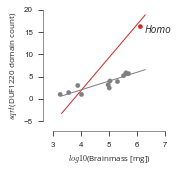

In [88]:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks", {"axes.linewidth": 0.5, 'xtick.major.size': 5, 'ytick.major.size': 5})
plt.figure(figsize=(2, 2), dpi=300)

# Only color the Homo outlier
colors = np.where(figure1c_data["Species"] == "Homo_sapiens",'#d62728', '#7f7f7f' )


fig1c = plt.scatter(figure1c_data["log10(Brain mass [mg])"],
            figure1c_data["sqrt(DUF)"],
            color=colors,
            s=20)

sns.axlabel(r'$log10$'+'(Brainmass [mg])', r'$sqrt$'+ '(DUF1220 domain count)', name="Open Sans", size=8)

#Add the first regression line including Homo
xi = np.arange(3.3,6.5)
intercept = figure1c_data.iloc[0]["with homo"]
slope = figure1c_data.iloc[1]["with homo"]
line_with_homo = slope*xi+intercept
plt.plot(xi,line_with_homo, color='#d62728', linewidth=1)
plt.text(6.3, 15, "Homo", name="Open Sans", size=10, style="italic")

#Add the second regression line excluding Homo
intercept = figure1c_data.iloc[0]["without"]
slope = figure1c_data.iloc[1]["without"]
line_without_homo = slope*xi+intercept
plt.plot(xi,line_without_homo,color='#7f7f7f', linestyle="-", linewidth=1)


plt.xticks(np.arange(3, 7.5, 1))
sns.despine(offset=10, trim=True)

plt.savefig("2015-03-12-DUF1220-fig1c.svg", facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)

### Figure S4 - Scatter plot using log DUF counts instead of square root

In [89]:
figureS4_data = xls.parse('Figure S4', na_values=['NA'])

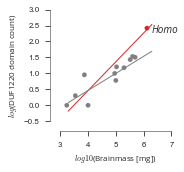

In [90]:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks", {"axes.linewidth": 0.5, 'xtick.major.size': 5, 'ytick.major.size': 5})
plt.figure(figsize=(2, 2), dpi=300)

# Only color the Homo outlier
colors = np.where(figureS4_data["Species"] == "Homo_sapiens",'#d62728', '#7f7f7f' )


fig1c = plt.scatter(figureS4_data["log10(Brain mass [mg])"],
            figureS4_data["log(DUF)"],
            color=colors,
            s=20)

sns.axlabel(r'$log10$'+'(Brainmass [mg])', r'$log$'+ '(DUF1220 domain count)', name="Open Sans", size=8)

#Add the first regression line including Homo
xi = np.arange(3.3,6.5)
intercept = figureS4_data.iloc[0]["with homo"]
slope = figureS4_data.iloc[1]["with homo"]
line_with_homo = slope*xi+intercept
plt.plot(xi,line_with_homo, color='#d62728', linewidth=1)
plt.text(6.3, 2.3, "Homo", name="Open Sans", size=10, style="italic")

#Add the second regression line excluding Homo
intercept = figureS4_data.iloc[0]["without"]
slope = figureS4_data.iloc[1]["without"]
line_without_homo = slope*xi+intercept
plt.plot(xi,line_without_homo,color='#7f7f7f', linestyle="-", linewidth=1)


plt.xticks(np.arange(3, 7.5, 1))
sns.despine(offset=10, trim=True)

plt.savefig("2015-03-12-DUF1220-figS4.svg", facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)

### Figure S1 - DUF1220 distribution across Ensembl versions

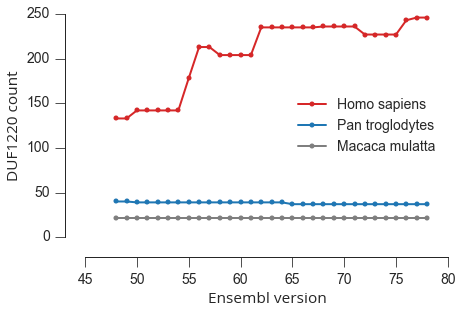

In [219]:
def read_domtblout(source):
    '''Reads in a domtblout file and counts domain annotations'''
    hits = {}
    try:
        with open(source, "r") as infile:
            for line in infile:
                # Ignore comments
                if not line.startswith("#"):
                    fields = line.split()
                    target = fields[0]
                    if target in hits:
                        hits[target] += 1
                    else:
                        hits[target] = 1
            return hits
    except IOError:
        print("File does not exit!")

def list_files(current_dir):
    '''List files in the current directory'''
    file_list = []
    for path, subdirs, files in os.walk(current_dir):  # Walk directory tree
        for name in files:
            f = os.path.join(path, name)
            file_list.append(f)
    return file_list


infolder = "2015-02-20-hmmsearch-vs-pep-all-longest-ensembl-range"

domain_counts = {"homo_sapiens": [],
                 "pan_troglodytes": [],
                 "macaca_mulatta": []}

for f in list_files(infolder):
    if f.endswith("domtblout"):
        version = int(f.split("-")[-1].split(".")[0][1:])
        species = f.split("-")[-2]
        domtblout = read_domtblout(f)
        domain_counts[species].append((version, sum(domtblout.values())))


# Sort data by version
for s, counts in domain_counts.items():
    counts.sort(key=lambda tup: tup[0])
sns.set_context("paper", font_scale=1.75)
sns.set_style("ticks", {"axes.linewidth": 1, 'xtick.major.size': 10, 'ytick.major.size': 10})
plt.figure(figsize=(6.5, 4), dpi=300)
sns.axlabel("Ensembl version","DUF1220 count", name="Open Sans")
# plt.scatter(*zip(*domain_counts["homo_sapiens"]))
plt.plot(*zip(*domain_counts["homo_sapiens"]),color='#d62728', linewidth=2.0,label='Homo sapiens', marker='o', markersize=5)
plt.plot(*zip(*domain_counts["pan_troglodytes"]),color='#1f77b4',linewidth=2.0, label='Pan troglodytes', marker='o', markersize=5)
plt.plot(*zip(*domain_counts["macaca_mulatta"]), color='#7f7f7f',linewidth=2.0, label='Macaca mulatta', marker='o', markersize=5)
plt.legend(loc='center right')
sns.despine(offset=20, trim=True)
plt.savefig("2015-03-12-DUF1220-figS1.svg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)

### Figure S2

In [155]:
figureS2_data = xls.parse('figure S2', na_values=['NA'])

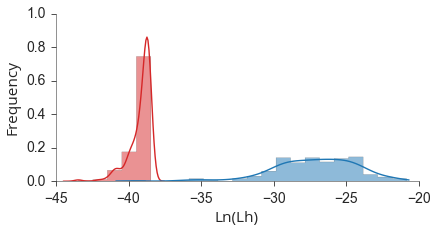

In [242]:
sns.set_context("paper", font_scale=1.75)
sns.set_style("ticks", {"axes.linewidth": 0.5, 'xtick.major.size': 5, 'ytick.major.size': 5})
plt.figure(figsize=(6.5, 3), dpi=300)
onerate = figureS2_data['one-rate model']
variablerate = figureS2_data['variable rate model']

binwidth = 1
sns.distplot(onerate, color="#d62728", bins=np.arange(min(onerate), max(onerate) + binwidth, binwidth), hist_kws={"histtype": "stepfilled", "alpha": 0.5})
sns.distplot(variablerate, color="#1f77b4", bins=np.arange(min(variablerate), max(variablerate) + binwidth, binwidth), hist_kws={"histtype": "stepfilled", "alpha": 0.5})
sns.despine()
sns.axlabel("Ln(Lh)", "Frequency", name="Open Sans")
plt.yticks(np.arange(0, 1.2, 0.2))
plt.savefig("2015-03-12-DUF1220-figS2.svg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)

### Figure S3

In [243]:
figureS3_data = xls.parse('figure S3', na_values=['NA'])
figureS3_data.head()

,Non-directional model,Directional Model
0,-20.415227,-20.000534
1,-23.171824,-18.517010
2,-20.428221,-18.403705
3,-21.751506,-22.335617
4,-24.267013,-23.123093


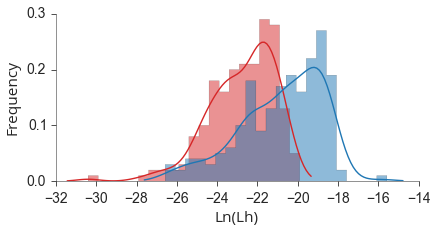

In [244]:
sns.set_context("paper", font_scale=1.75)
sns.set_style("ticks", {"axes.linewidth": 0.5, 'xtick.major.size': 5, 'ytick.major.size': 5})
plt.figure(figsize=(6.5, 3), dpi=300)
directional = figureS3_data['Non-directional model']
nondirectional = figureS3_data['Directional Model']

binwidth = 0.5
sns.distplot(directional, color="#d62728", bins=np.arange(min(directional), max(directional) + binwidth, binwidth), hist_kws={"histtype": "stepfilled", "alpha": 0.5})
sns.distplot(nondirectional, color="#1f77b4", bins=np.arange(min(nondirectional), max(nondirectional) + binwidth, binwidth), hist_kws={"histtype": "stepfilled", "alpha": 0.5})
sns.despine()
sns.axlabel("Ln(Lh)", "Frequency", name="Open Sans")
plt.yticks(np.arange(0, 0.4, 0.1))
# plt.xticks(np.arange(-32, -14, 2.5))
plt.savefig("2015-03-12-DUF1220-figS3.svg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)